In [1]:
import ringity as rng
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

from utils.layout import Layout

In [2]:
FIBRO_FILE = "VR/fibro/connectivity_FLS11_data.xls"

name = "FLS18 TNF"

In [3]:
d = 115 # threshold

fibro_position_df = pd.read_excel(FIBRO_FILE, sheet_name=name)
D_fibro = squareform(pdist(fibro_position_df[['Position X','Position Y','Position Z']])) # distance matrix

G_fibro = nx.from_numpy_array(np.where(D_fibro > d,0,1)) # create (unweighted) network 
G_fibro = G_fibro.subgraph(max(nx.connected_components(G_fibro), key=len)).copy() # get lcc, in case threshold was chosen too low
    
pos = nx.spring_layout(G_fibro, dim=3)

In [4]:
G_fibro.remove_edges_from(nx.selfloop_edges(G_fibro))
nx.info(G_fibro)

C:\Users\maxst\AppData\Local\Temp\ipykernel_1188\4238979789.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_fibro)


'Graph with 403 nodes and 6866 edges'

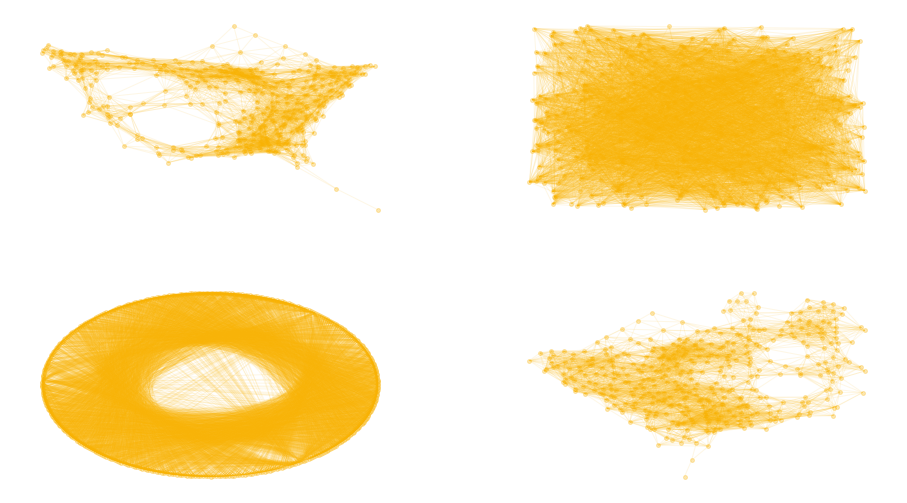

In [27]:
yellow = np.array((248, 177, 0)) / 255
plot = lambda ax, layout: rng.plot_nx(G_fibro, ax=ax, node_colors=[yellow], edge_colors=[yellow], edge_alpha=0.1, pos=layout(G_fibro))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
plot(axs[0,0], nx.spring_layout)
plot(axs[0,1], nx.random_layout)
plot(axs[1,0], nx.shell_layout)
plot(axs[1,1], nx.kamada_kawai_layout)
plt.savefig("video/footage/fibro_network.png")
plt.show()

In [5]:
layout = Layout(G_fibro, pos, node_colors=[(248, 177, 0, 100)], edge_colors=[(248, 177, 0, 100)])

In [6]:
#layout.write("VR/fibro/fibro")

In [5]:
dgm = rng.diagram(G_fibro)

c:\Users\maxst\Repositories\Complex-Network-Analysis-Project\.venv\lib\site-packages\ringity\centralities.py:60: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


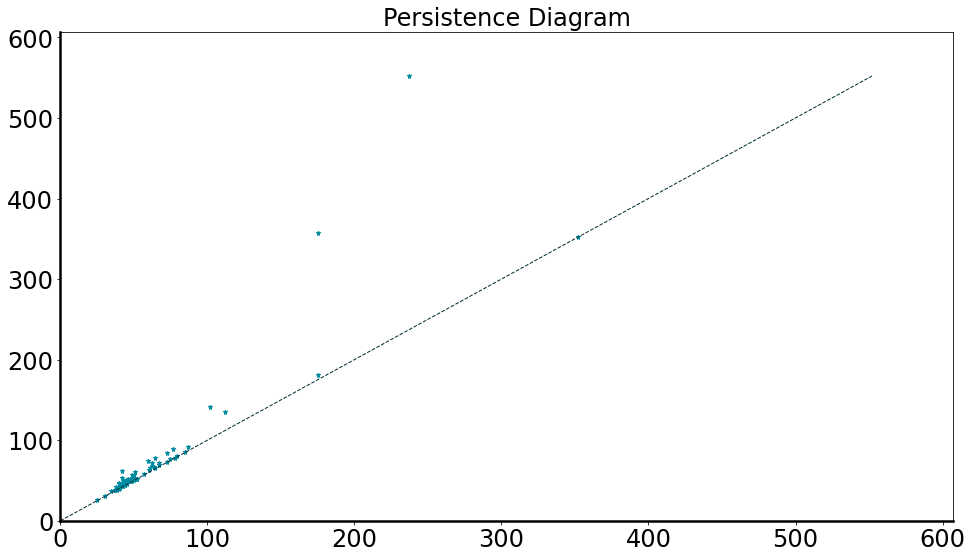

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title("Persistence Diagram", fontsize=24)
rng.plot_dgm(dgm, ax=ax)
plt.savefig("video/footage/fibro_diagram.png")
plt.show()